In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pyodbc
from string import ascii_lowercase

In [72]:
sql_conn = pyodbc.connect('DRIVER={SQL Server};'
                            'SERVER=L_AAGDATIX;'
                            'DATABASE=DatixCRM;'
                            'Trusted_Connection=yes') 
query = "set transaction isolation level read uncommitted select b.description, c.description from DatixCRM.dbo.code_unit b join DatixCRM.dbo.incidents_main a on a.inc_unit = b.code join DatixCRM.dbo.code_location c on a.inc_loctype = c.code where a.inc_type='PAT' and a.inc_category='MEDIC' and a.inc_organisation='QA'"
df = pd.read_sql(query, sql_conn)
df.columns = ['division-care_group','location_type']
df.head()

,division-care_group,location_type
0,"Clinical Delivery Division - Critical Care, Th...",Ward
1,"Clinical Delivery Division - Critical Care, Th...",Ward
2,"Clinical Delivery Division - Critical Care, Th...",Operating Theatre
3,"Clinical Delivery Division - Critical Care, Th...",Ward
4,"Clinical Delivery Division - Critical Care, Th...",Ward


In [73]:
df['division-care_group'] = df['division-care_group'].str.replace(' and ',' & ')
divider = df['division-care_group'].str.split(" Division - ",n=1,expand=True)
df['division'] = divider[0]
df['care_group'] = divider[1]
#df['division'] = df['division'].str.replace(' and ',' & ')
df.loc[df.division == 'Corporate Functions', 'care_group'] = 'Corporate Functions'
df = df[df['division-care_group'] != 'Corporate Functions']
df = df[df.care_group != 'Pathology']
df = df[df.care_group != 'Patient Administration Services']
#df.loc[df.division == 'Surgical & Outpatients', 'division'] = 'Surgical & Outpatients + Corporate Functions'
#df.loc[df.division == 'Corporate Functions', 'division'] = 'Surgical & Outpatients + Corporate Functions'

In [74]:
division_counts = df['division'].value_counts()
division_percentages = 100*division_counts/sum(division_counts.values)
division_labels = [str(i) for i in division_counts.index]
print(division_percentages)

Medicine & Urgent Care    46.200771
Networked Services        19.755993
Surgical & Outpatients    17.422945
Clinical Delivery         16.620291
Name: division, dtype: float64


In [75]:
df['division_sorted'] = pd.Categorical(df['division'], division_labels)
df = df.sort_values("division_sorted")
df.head()

,division-care_group,location_type,division,care_group,division_sorted
4697,Medicine & Urgent Care Division - Urgent Care,Ward,Medicine & Urgent Care,Urgent Care,Medicine & Urgent Care
3588,Medicine & Urgent Care Division - Older Person...,Ward,Medicine & Urgent Care,Older Persons Medicine,Medicine & Urgent Care
3587,Medicine & Urgent Care Division - Older Person...,Ward,Medicine & Urgent Care,Older Persons Medicine,Medicine & Urgent Care
3586,Medicine & Urgent Care Division - Older Person...,Ward,Medicine & Urgent Care,Older Persons Medicine,Medicine & Urgent Care
3585,Medicine & Urgent Care Division - Older Person...,Ward,Medicine & Urgent Care,Older Persons Medicine,Medicine & Urgent Care


In [76]:
care_group_labels = []
for i in division_counts.index:
    df_division = df[df.division == i]
    per_division_counts = df_division['care_group'].value_counts()
    care_group_labels += [str(i) for i in per_division_counts.index]
print(care_group_labels)

['Medicine', 'Urgent Care', 'Older Persons Medicine', "Women & Children's", 'Regional Cancer Centre', 'Renal & Transplantation', 'MSK / Head & Neck', 'Surgery', 'Private Patients Unit', 'Pharmacy', 'Critical Care, Theatres, Anaesthetics & HSDU', 'Imaging Radiology']


In [77]:
df['care_group_sorted'] = pd.Categorical(df['care_group'], care_group_labels)
df = df.sort_values(['division_sorted','care_group_sorted'])
df.head()

,division-care_group,location_type,division,care_group,division_sorted,care_group_sorted
2903,Medicine & Urgent Care Division - Medicine,Ward,Medicine & Urgent Care,Medicine,Medicine & Urgent Care,Medicine
2902,Medicine & Urgent Care Division - Medicine,Ward,Medicine & Urgent Care,Medicine,Medicine & Urgent Care,Medicine
2880,Medicine & Urgent Care Division - Medicine,Treatment Room/Area,Medicine & Urgent Care,Medicine,Medicine & Urgent Care,Medicine
2879,Medicine & Urgent Care Division - Medicine,Ward,Medicine & Urgent Care,Medicine,Medicine & Urgent Care,Medicine
2878,Medicine & Urgent Care Division - Medicine,Ward,Medicine & Urgent Care,Medicine,Medicine & Urgent Care,Medicine


In [78]:
care_group_counts = df['care_group'].value_counts()[df['care_group'].unique()]
care_group_percentages = 100*care_group_counts/sum(care_group_counts.values)
print(care_group_percentages)

Medicine                                        18.557363
Urgent Care                                     18.161387
Older Persons Medicine                           9.482021
Women & Children's                               9.642551
Regional Cancer Centre                           6.720890
Renal & Transplantation                          3.392551
MSK / Head & Neck                                9.524829
Surgery                                          7.330908
Private Patients Unit                            0.567209
Pharmacy                                        11.633134
Critical Care, Theatres, Anaesthetics & HSDU     4.045377
Imaging Radiology                                0.941781
Name: care_group, dtype: float64


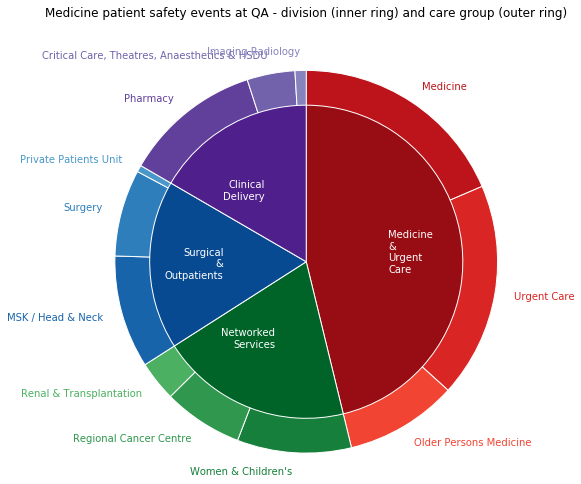

In [79]:
# Create colors
a, b, c, d, e =[plt.cm.Reds, plt.cm.Oranges, plt.cm.Greens, plt.cm.Blues, plt.cm.Purples]
a, c, d, e = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues, plt.cm.Purples]
inner_ring_colours = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues, plt.cm.Purples]

# First Ring (Inside)
fig, ax = plt.subplots()
ax.axis('equal')
division_labels_newlines = [i.replace(' ','\n') for i in division_labels]
#mypie, _ = ax.pie(division_counts, radius=2, labels=division_labels_newlines, labeldistance=0.6, colors=[a(0.9), b(0.9), c(0.9), d(0.9), e(0.9)], textprops={'color':'w'})
mypie, _ = ax.pie(division_counts, radius=1.9, labels=division_labels_newlines, labeldistance=0.5, colors=[inner_ring_colours[0](0.9), inner_ring_colours[1](0.9), inner_ring_colours[2](0.9), inner_ring_colours[3](0.9)], textprops={'color':'w'}, startangle=90, counterclock=False)
plt.setp( mypie, width=1.9, edgecolor='white')
 
# Second Ring (oUTside)
#care_group_colours = [a(0.8), a(0.7), a(0.6), a(0.5), b(0.8), c(0.8), c(0.7), c(0.6), d(0.8), d(0.7), d(0.6), e(0.8), e(0.7), e(0.6)]
care_group_colours = []
for i,index in enumerate(division_counts.index):
    df_division = df[df.division == index]
    per_division_counts = df_division['care_group'].value_counts()
    slice_colour = 8
    for j in range(len(per_division_counts)):
        care_group_colours.append(inner_ring_colours[i](slice_colour/10))
        slice_colour -= 1

mypie2, texts = ax.pie(care_group_counts, radius=2.2, labels=care_group_labels, colors=care_group_colours, startangle=90, counterclock=False)
plt.setp( mypie2, width=0.4, edgecolor='white')
for text, color in zip(texts, care_group_colours):
    text.set_color(color)
plt.margins(0,0)

plt.title('Medicine patient safety events at QA - division (inner ring) and care group (outer ring)', y=1.6);

In [80]:
#df.loc[df['location_type'] == 'Intensive Care Unit or High Dependency Unit', 'location_type'] = 'ICU/HDU'

In [81]:
location_type_counts = df['location_type'].value_counts()[df['location_type'].unique()]
print(location_type_counts.index)

Index(['Ward', 'Treatment Room/Area', 'Outpatient Department',
       'Patient's Home', 'Pharmacy', 'Recovery Room', 'Therapy Department',
       'Accident and Emergency',
       'Hospital Buildings (Inside) Not listed above', 'Laboratory',
       'Waiting Room/ Corridor', 'Operating Theatre',
       'Intensive Care Unit or High Dependency Unit', 'Radiology Department',
       'Ward Toilet', 'GP Surgery', 'Day Surgery Unit',
       'Public Place or Street', 'Injection Room',
       'Hospital Grounds (Outside)', 'Day Hospital', 'Imaging Room',
       'Ward Bathroom', 'Anaesthetic Room', 'Ward Kitchen', 'Health & Safety',
       'Hospital Transport (car)'],
      dtype='object')


In [82]:
location_type_labels = []
for i in care_group_counts.index:
    df_care_group = df[df.care_group == i]
    per_care_group_counts = df_care_group['location_type'].value_counts()
    location_type_labels += [i + ' - ' + str(j) for j in per_care_group_counts.index]
print(location_type_labels)

['Medicine - Ward', 'Medicine - Treatment Room/Area', "Medicine - Patient's Home", 'Medicine - Hospital Buildings (Inside) Not listed above', 'Medicine - Pharmacy', 'Medicine - Outpatient Department', 'Medicine - Operating Theatre', 'Medicine - Recovery Room', 'Medicine - Accident and Emergency', 'Medicine - Laboratory', 'Medicine - Radiology Department', 'Medicine - Day Surgery Unit', 'Medicine - Ward Toilet', 'Medicine - Waiting Room/ Corridor', 'Medicine - GP Surgery', 'Medicine - Therapy Department', 'Medicine - Intensive Care Unit or High Dependency Unit', 'Urgent Care - Ward', 'Urgent Care - Accident and Emergency', 'Urgent Care - Treatment Room/Area', 'Urgent Care - Pharmacy', 'Urgent Care - Hospital Buildings (Inside) Not listed above', 'Urgent Care - Waiting Room/ Corridor', "Urgent Care - Patient's Home", 'Urgent Care - Outpatient Department', 'Urgent Care - Public Place or Street', 'Urgent Care - GP Surgery', 'Urgent Care - Injection Room', 'Urgent Care - Hospital Grounds (O

In [83]:
df['care_group-location_type'] = df['care_group'] + ' - ' + df['location_type']
df['location_type_sorted'] = pd.Categorical(df['care_group-location_type'], location_type_labels)
df = df.sort_values(['division_sorted','care_group_sorted','location_type_sorted'])
df.head()

,division-care_group,location_type,division,care_group,division_sorted,care_group_sorted,care_group-location_type,location_type_sorted
2903,Medicine & Urgent Care Division - Medicine,Ward,Medicine & Urgent Care,Medicine,Medicine & Urgent Care,Medicine,Medicine - Ward,Medicine - Ward
2902,Medicine & Urgent Care Division - Medicine,Ward,Medicine & Urgent Care,Medicine,Medicine & Urgent Care,Medicine,Medicine - Ward,Medicine - Ward
2879,Medicine & Urgent Care Division - Medicine,Ward,Medicine & Urgent Care,Medicine,Medicine & Urgent Care,Medicine,Medicine - Ward,Medicine - Ward
2878,Medicine & Urgent Care Division - Medicine,Ward,Medicine & Urgent Care,Medicine,Medicine & Urgent Care,Medicine,Medicine - Ward,Medicine - Ward
2877,Medicine & Urgent Care Division - Medicine,Ward,Medicine & Urgent Care,Medicine,Medicine & Urgent Care,Medicine,Medicine - Ward,Medicine - Ward


In [84]:
location_type_counts = df['care_group-location_type'].value_counts()[df['care_group-location_type'].unique()]
location_type_percentages = 100*location_type_counts/sum(location_type_counts.values)

In [88]:
for location_type,percentage in location_type_percentages.iteritems():
    if percentage < 0.663528:
        df.loc[df['care_group-location_type'] == location_type, 'care_group-location_type'] = location_type.split(" - ")[0] + ' - Other'

In [89]:
location_type_counts = df['care_group-location_type'].value_counts()[df['care_group-location_type'].unique()]
location_type_percentages = 100*location_type_counts/sum(location_type_counts.values)
location_type_labels_split = location_type_counts.index.str.split(" - ",n=1)
location_type_labels = [el[1] for el in location_type_labels_split]
print(location_type_percentages)

Medicine - Ward                                                                               16.491866
Medicine - Treatment Room/Area                                                                 0.717038
Medicine - Other                                                                               1.348459
Urgent Care - Ward                                                                            10.380993
Urgent Care - Accident and Emergency                                                           6.324914
Urgent Care - Treatment Room/Area                                                              0.888271
Urgent Care - Other                                                                            0.567209
Older Persons Medicine - Ward                                                                  8.807791
Older Persons Medicine - Other                                                                 0.674229
Women & Children's - Ward                                       

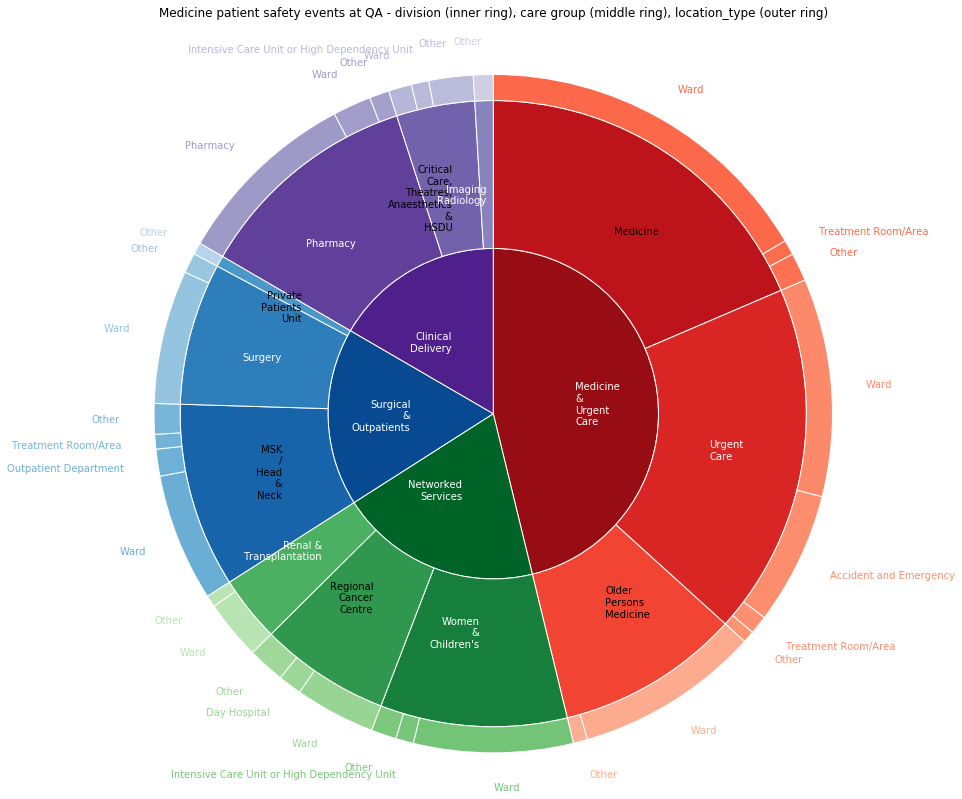

In [90]:
# Create colors
a, b, c, d, e =[plt.cm.Reds, plt.cm.Oranges, plt.cm.Greens, plt.cm.Blues, plt.cm.Purples]
a, c, d, e = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues, plt.cm.Purples]
division_colour_dict = {'Medicine & Urgent Care':plt.cm.Reds, 'Networked Services':plt.cm.Greens, 'Surgical & Outpatients':plt.cm.Blues, 'Clinical Delivery':plt.cm.Purples}
inner_ring_colours = [division_colour_dict[division] for division in division_labels]

# First Ring (Inside)
fig, ax = plt.subplots()
ax.axis('equal')
division_labels_newlines = [i.replace(' ','\n') for i in division_labels]
#mypie, _ = ax.pie(division_counts, radius=2, labels=division_labels_newlines, labeldistance=0.6, colors=[a(0.9), b(0.9), c(0.9), d(0.9), e(0.9)], textprops={'color':'w'})
mypie, _ = ax.pie(division_counts, radius=1.9, labels=division_labels_newlines, labeldistance=0.5, colors=[a(0.9), c(0.9), d(0.9), e(0.9)], textprops={'color':'w'}, startangle=90, counterclock=False)
plt.setp( mypie, width=1.9, edgecolor='white')
 
# Second Ring (oUTside)
care_group_labels_newlines = [i.replace(' ','\n') for i in care_group_labels]
care_group_labels_newlines[care_group_labels_newlines.index('Renal\n&\nTransplantation')] = 'Renal &\nTransplantation'
#care_group_labels_newlines[care_group_labels_newlines.index('Critical\nCare,\nTheatres,\nAnaesthetics\n&\nHSDU')] = 'Critical Care, Theatres,\nAnaesthetics\n& HSDU'
#care_group_labels_newlines[care_group_labels_newlines.index('Imaging\nRadiology')] = 'Imaging Radiology'
#care_group_colours = [a(0.8), a(0.7), a(0.6), a(0.5), b(0.8), c(0.8), c(0.7), c(0.6), d(0.8), d(0.7), d(0.6), e(0.8), e(0.7), e(0.6)]
care_group_colours = [a(0.8), a(0.7), a(0.6), c(0.8), c(0.7), c(0.6), d(0.8), d(0.7), d(0.6), e(0.8), e(0.7), e(0.6)]
care_group_colours = []
for i,index in enumerate(division_counts.index):
    df_division = df[df.division == index]
    per_division_counts = df_division['care_group'].value_counts()
    slice_colour = 8
    for j in range(len(per_division_counts)):
        care_group_colours.append(inner_ring_colours[i](slice_colour/10))
        slice_colour -= 1
mypie2, texts = ax.pie(care_group_counts, radius=3.6, labels=care_group_labels_newlines, labeldistance=0.7, colors=care_group_colours, textprops={'color':'k'},startangle=90, counterclock=False)
plt.setp( mypie2, width=1.7, edgecolor='white')
care_group_label_colours = ['k' if i%2==0 else 'w' for i in range(len(care_group_counts))]
for text, color in zip(texts, care_group_label_colours):
    text.set_color(color)
plt.margins(0,0)

# Third Ring (oUTside)
location_type_colours = [a(0.5),a(0.49),a(0.48),a(0.47),a(0.4),a(0.39),a(0.38),a(0.37),a(0.36),a(0.35),a(0.34),a(0.33),a(0.32),a(0.31),a(0.30),a(0.29),a(0.28),a(0.27),a(0.26),a(0.25),a(0.24),c(0.50),c(0.49),c(0.48),c(0.47),c(0.46),c(0.45),c(0.40),c(0.39),c(0.38),c(0.37),c(0.36),c(0.30),c(0.29),c(0.28),c(0.27),d(0.50),d(0.40),d(0.39),d(0.38),d(0.37),d(0.30),e(0.50),e(0.49),e(0.48),e(0.47),e(0.46),e(0.45),e(0.44),e(0.40),e(0.39),e(0.38),e(0.37)]
location_type_colours = []
for i,div_index in enumerate(division_counts.index):
    df_division = df[df.division == div_index]
    slice_colour_orig = 0.5
    division_care_group_counts = df_division['care_group'].value_counts()[df_division['care_group'].unique()]
    for j,care_index in enumerate(division_care_group_counts.index):
        df_care_group = df_division[df_division['care_group-location_type'].str.startswith(care_index)]
        per_care_group_counts = df_care_group['care_group-location_type'].value_counts()[df_care_group['care_group-location_type'].unique()]
        slice_colour = slice_colour_orig - j/10
        for k in per_care_group_counts:
            location_type_colours.append(inner_ring_colours[i](slice_colour))
            slice_colour -= 0.01
mypie3, texts = ax.pie(location_type_counts, radius=3.9, labels=location_type_labels, colors=location_type_colours, startangle=90, counterclock=False)
plt.setp( mypie3, width=0.3, edgecolor='white')
for text, color in zip(texts, location_type_colours):
    text.set_color(color)
plt.margins(0,0)

plt.title('Medicine patient safety events at QA - division (inner ring), care group (middle ring), location_type (outer ring)', y=2.3);